## Day 27 Lecture 2 Assignment

In this assignment, we will learn about interpreting linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

In [7]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We will predict app ratings using other features describing the app. Recall from the previous assignment our data cleansing steps and do the following:

1. Remove the following columns: app, category, size, installs, genres, last updated, current ver, android ver
2. Convert all columns to numeric and remove rows where this conversion causes null values
3. Split the data into test and train subsets with 25% of the data in the test set

In [4]:
reviews.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [0]:
# answer below:
reviews.drop(['App', 'Category', 'Size',  'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], inplace=True, axis=1)


In [0]:
reviews.drop(10472, axis=0, inplace=True)

In [54]:
reviews.info()
reviews['Reviews'] = pd.to_numeric(reviews['Reviews'])
reviews = reviews[reviews['Reviews'].astype(str).str.isnumeric()]

reviews['Price']= reviews['Price'].apply(lambda x: float(x.replace('$','')))  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 6 columns):
Rating            9366 non-null float64
Reviews           10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
dtypes: float64(1), object(5)
memory usage: 592.8+ KB


In [50]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 5 columns):
Rating            9366 non-null float64
Reviews           9366 non-null int64
Type              9366 non-null object
Price             9366 non-null float64
Content Rating    9366 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 439.0+ KB


In [0]:
reviews['Installs']= reviews['Installs'].apply(lambda y: y.replace(',','').replace('+',''))  

In [0]:
reviews = reviews[reviews['Installs'].astype(str).str.isnumeric()]
reviews['Installs'] = pd.to_numeric(reviews['Installs'])

In [58]:
reviews.dropna(inplace=True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 6 columns):
Rating            9366 non-null float64
Reviews           9366 non-null int64
Installs          9366 non-null int64
Type              9366 non-null object
Price             9366 non-null float64
Content Rating    9366 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 512.2+ KB


In [0]:
type_dummy = pd.get_dummies(reviews['Type'],prefix = 'type', drop_first = True)
content_rating_dummy = pd.get_dummies(reviews['Content Rating'], prefix = 'rating', drop_first = True)
df = pd.concat([reviews, type_dummy,content_rating_dummy], axis = 1)

In [0]:
df.drop(['Content Rating','Type'], axis=1, inplace=True)

In [62]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'Rating')
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     9.923
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           2.69e-15
Time:                        18:59:11   Log-Likelihood:                -7033.6
No. Observations:                9366   AIC:                         1.409e+04
Df Residuals:                    9356   BIC:                         1.416e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.2997    

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
predict = results.predict(X)
error =y -predict

Check model assumptions of homoscedacity, normality of errors, and multicollinearity

In [26]:
#answer below:
error.mean()


7.592847744709839e-13

In [29]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predict,error)
lev_stats = levene(predict,error)

print(bart_stats)
print(lev_stats)

BartlettResult(statistic=32971.51146247678, pvalue=0.0)
LeveneResult(statistic=6554.491690879923, pvalue=0.0)


In [31]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(error)
norm_stats = normaltest(error)

print(jb_stats)
print(norm_stats)

(18727.143880593478, 0.0)
NormaltestResult(statistic=3694.67404967249, pvalue=0.0)


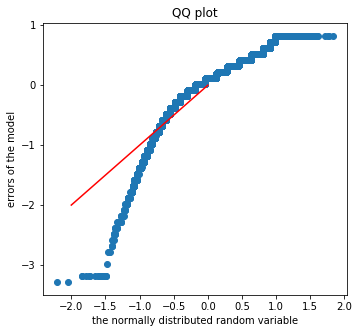

In [32]:
rand_nums = np.random.normal(np.mean(error), np.std(error), len(error))

min1 = int(rand_nums.min())
max1 = int(rand_nums.max())

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(error))
plt.plot(range(min1,max1),range(min1,max1), color='r')
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")
plt.show()


In [33]:
X.corr()

,const,Reviews,Price,type_Paid
const,NaN,NaN,NaN,NaN
Reviews,NaN,1.00000,-0.00982,-0.04329
Price,NaN,-0.00982,1.00000,0.22304
type_Paid,NaN,-0.04329,0.22304,1.00000


Using the information above, try to select only the variables you think will lead to a better model and construct that model. Print out a summary

In [34]:
#answer below:

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     23.42
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           4.27e-15
Time:                        18:43:36   Log-Likelihood:                -7043.1
No. Observations:                9366   AIC:                         1.409e+04
Df Residuals:                    9362   BIC:                         1.412e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1799      0.006    749.589      0.000       4.169       4.191
Reviews     1.147e-08   1.69e-09      6.790      0.000    8.16e-09    1.48e-08
Price         -0.0011      0.000     -3.061      0.002      -0.002      -0.000
type_Paid      0.1012      0.021      4.713      0.000       0.059       0.143
==============================================================================
Omnibus:                     3694.674   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18727.144
Skew:                          -1.853   Prob(JB):                         0.00
Kurtosis:                       8.852   Cond. No.                     1.29e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
X2 = df.drop(columns = ['Rating','Price'])
y2 = df['Rating']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25)
X2 = sm.add_constant(X2)
results2 = sm.OLS(y2, X2).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     9.991
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           5.85e-14
Time:                        18:59:42   Log-Likelihood:                -7038.3
No. Observations:                9366   AIC:                         1.409e+04
Df Residuals:                    9357   BIC:                         1.416e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.2997    

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Plot the scatterplots between the independent variables you select and ratings. Do you think given this graph, these variables have good predictive power? 

In [0]:
# answer below:
import seaborn as sns


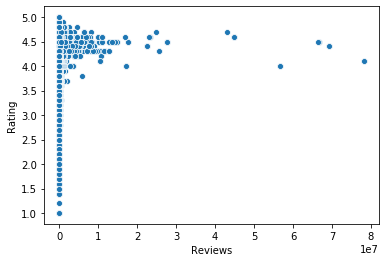

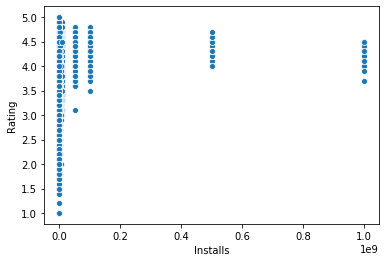

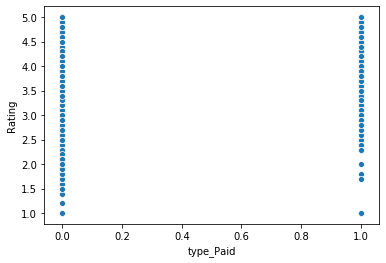

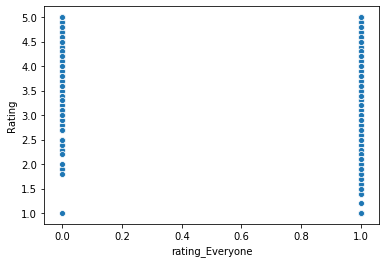

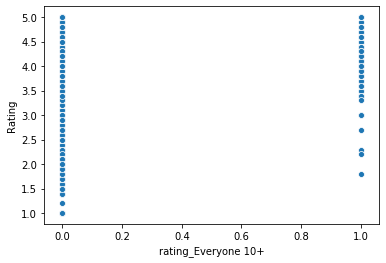

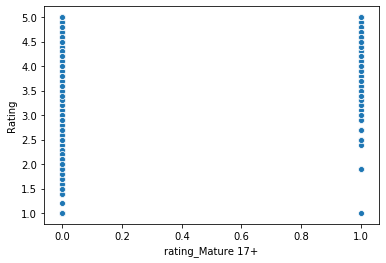

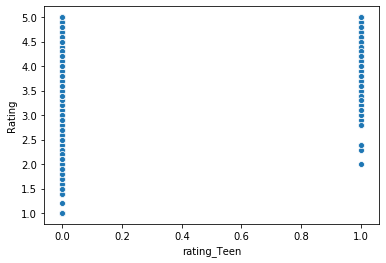

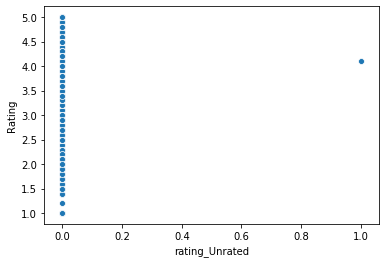

In [65]:
for name  in  X2_train.columns:
    sns.scatterplot(x= X2[name], y =y2)
    plt.show();